# Task 2. Investigating Relationships (part 1)

Completed by Igor Malysh, Ekaterina Tyukavkina

Analyze the data on Global AI Job Market & Salary Trends 2025.

[Source](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025)

The file `ai_job_dataset.csv` contains the following variables:

| Variable name | Variable description
|:-------------------:|:------------------:|
| job_id | Unique identifier for each job posting |
| job_title | Standardized job title | 
| salary_usd | Annual salary in USD| 
| salary_currency | Original salary currency| 
| salary_local | Salary in local currency| 
| experience_level | EN (Entry), MI (Mid), SE (Senior), EX (Executive)| 
| employment_type |	FT (Full-time), PT (Part-time), CT (Contract), FL (Freelance)| 
| company_location | Country where company is located| 	
| company_size | S (Small <50), M (Medium 50-250), L (Large >250)| 
| employee_residence |	Country where employee resides|
| remote_ratio | 0 (No remote), 50 (Hybrid), 100 (Fully remote)|
| required_skills |	Top 5 required skills (comma-separated)|
| education_required |	Minimum education requirement|
| years_experience | Required years of experience|
| industry | Industry sector of the company |
| posting_date | Date when job was posted |
| application_deadline | Application deadline |
| job_description_length | Character count of job description |
| benefits_score |	Numerical score of benefits package (1-10) |

Please complete the following tasks.

1. For interval or ratio scale variables run suitable normality tests to check whether their distribution is close to the normal distribution. Formulate hypothesis. Create graphs to compare the variables’ distributions with the normal distribution. Make conclusions. 

In [243]:
# your code here

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings


df = pd.read_csv('ai_job_dataset.csv')

# number of observations and variables, variables’ measurement scale
warnings.filterwarnings('ignore')
df.head()


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [244]:
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [245]:
interval_or_ratio_scale_variables = ['salary_usd', 'remote_ratio', 'years_experience', 'job_description_length', 'benefits_score']

df[interval_or_ratio_scale_variables]

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
0,90376,50,9,1076,5.9
1,61895,100,1,1268,5.2
2,152626,0,2,1974,9.4
3,80215,50,7,1345,8.6
4,54624,100,0,1989,6.6
...,...,...,...,...,...
14995,38604,50,1,1635,7.9
14996,57811,0,0,1624,8.2
14997,189490,50,17,1336,7.4
14998,79461,0,1,1935,5.6


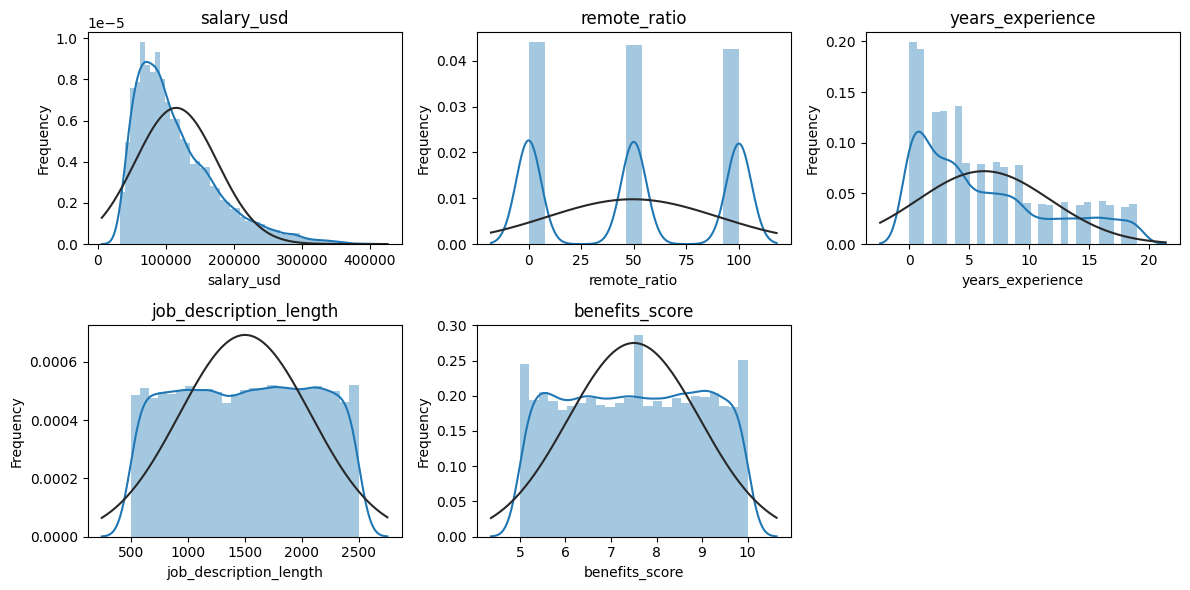

In [246]:
# used llm to plot multiple plots on one chart 

from scipy.stats import norm

vars = interval_or_ratio_scale_variables
n = len(vars)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3))
axes = axes.flatten()

for i, var in enumerate(vars):
    ax = axes[i]
    # ax.hist(df[var].dropna(), bins=20)

    sns.distplot(df[var].dropna(), ax=ax, fit=norm) 

    ax.set_title(var)
    ax.set_ylabel('Frequency')

for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [247]:
for var in interval_or_ratio_scale_variables:
    print(var, stats.shapiro(df[var].dropna()))
    print()

salary_usd ShapiroResult(statistic=np.float64(0.9008752460033119), pvalue=np.float64(1.7227839713232158e-70))

remote_ratio ShapiroResult(statistic=np.float64(0.7932819526307018), pvalue=np.float64(1.0955360919741062e-86))

years_experience ShapiroResult(statistic=np.float64(0.8939501363302923), pvalue=np.float64(6.599084785317721e-72))

job_description_length ShapiroResult(statistic=np.float64(0.9553456395491154), pvalue=np.float64(7.474712240221386e-55))

benefits_score ShapiroResult(statistic=np.float64(0.9535387124797851), pvalue=np.float64(1.390939767787847e-55))



H1: The distribution of var is different from the normal distribution

H0: The distribution of var is not different from the normal distribution

Conclusion: 
as p-value < 0.05 each of variables, H1 is accepted => the distribution is significantly different from normal for every variable

-------

2. Run a chi-square test to analyze the relationship between categorical variables. You can take the existing variables or create new categorical variables based on interval or ratio scale variables. Explain why the chi-square test is applicable to analyze the relationship between the selected pairs of variables. Create a contingency table based on these variables and describe the tendencies that you can observe in frequency distribution. Formulate hypotheses for the chi-square test, interpret the results of analysis and make conclusions. Create a suitable graph to demonstrate the relationship between the selected variables.

In [248]:
# your code here


# lets make a new categorical variable from column "remote_ratio"

mapping = {0: 'No Remote', 50: 'Hybrid', 100: 'Remote'}
df['remote_ratio_category'] = df['remote_ratio'].map(mapping).astype('object')


categorical_vars = ['experience_level', 'employment_type', 'company_size', 'remote_ratio_category']
df_categorical_vars = df[categorical_vars]

df = df.drop('remote_ratio_category', axis=1)

df_categorical_vars


,experience_level,employment_type,company_size,remote_ratio_category
0,SE,CT,M,Hybrid
1,EN,CT,M,Remote
2,MI,FL,L,No Remote
3,SE,FL,M,Hybrid
4,EN,PT,S,Remote
...,...,...,...,...
14995,EN,FL,S,Hybrid
14996,EN,CT,M,No Remote
14997,EX,CT,L,Hybrid
14998,EN,FT,M,No Remote



Analysis: experience_level vs employment_type
H0: Variables 'experience_level' and 'employment_type' are independent (no association).
H1: Variables 'experience_level' and 'employment_type' are associated (there is an association).
------------------------------------------------------------
Contingency table (counts):
employment_type    CT    FL   FT   PT
experience_level                     
EN                912   900  939  967
EX                953   920  963  924
MI                937  1000  924  920
SE                919   938  986  898

Chi2 = 11.512198
Degrees of freedom = 9
p-value = 0.242226 
n = 15000, table shape = 4 x 4

Expected frequencies:
employment_type       CT      FL      FT      PT
experience_level                                
EN                922.31  931.48  944.87  919.34
EX                932.73  942.01  955.54  929.72
MI                937.94  947.27  960.88  934.92
SE                928.02  937.25  950.71  925.02

Standardized residuals (obs - exp) / sqr

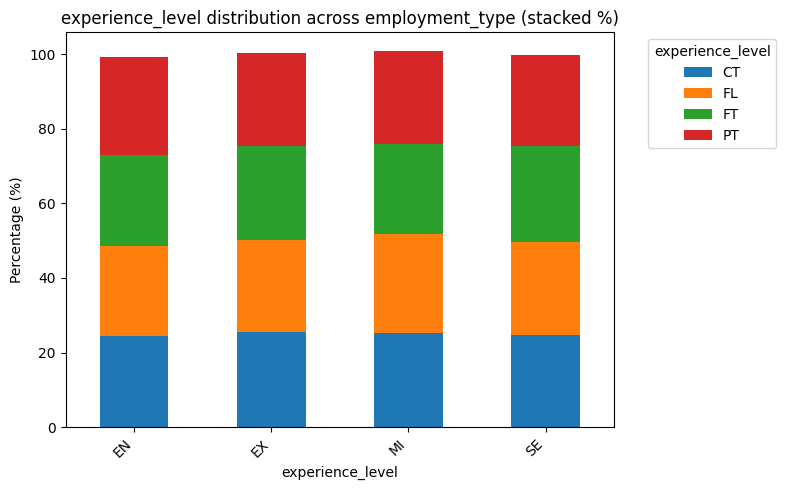

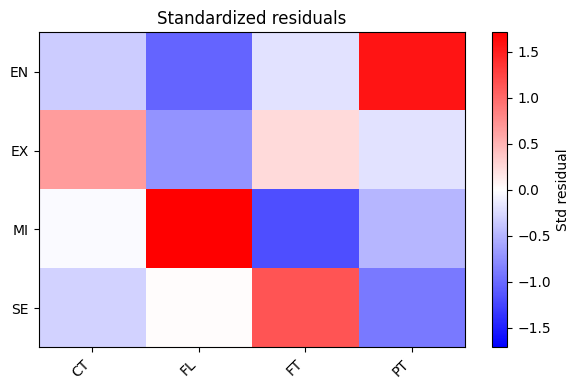


Analysis: experience_level vs company_size
H0: Variables 'experience_level' and 'company_size' are independent (no association).
H1: Variables 'experience_level' and 'company_size' are associated (there is an association).
------------------------------------------------------------
Contingency table (counts):
company_size         L     M     S
experience_level                  
EN                1214  1237  1267
EX                1201  1263  1296
MI                1284  1277  1220
SE                1299  1218  1224

Chi2 = 10.056921
Degrees of freedom = 6
p-value = 0.122275 
n = 15000, table shape = 4 x 3

Expected frequencies:
company_size            L        M        S
experience_level                           
EN                1238.84  1238.09  1241.07
EX                1252.83  1252.08  1255.09
MI                1259.83  1259.07  1262.10
SE                1246.50  1245.75  1248.75

Standardized residuals (obs - exp) / sqrt(exp):
company_size          L      M      S
experience_

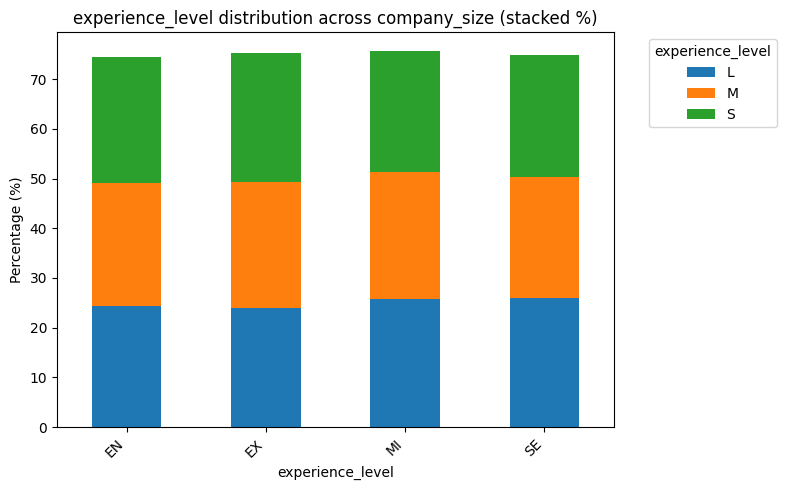

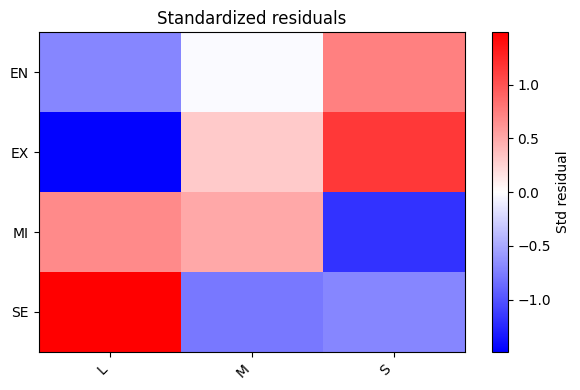


Analysis: experience_level vs remote_ratio_category
H0: Variables 'experience_level' and 'remote_ratio_category' are independent (no association).
H1: Variables 'experience_level' and 'remote_ratio_category' are associated (there is an association).
------------------------------------------------------------
Contingency table (counts):
remote_ratio_category  Hybrid  No Remote  Remote
experience_level                                
EN                       1245       1290    1183
EX                       1255       1244    1261
MI                       1285       1273    1223
SE                       1220       1268    1253

Chi2 = 5.066394
Degrees of freedom = 6
p-value = 0.535326 
n = 15000, table shape = 4 x 3

Expected frequencies:
remote_ratio_category   Hybrid  No Remote   Remote
experience_level                                  
EN                     1240.57    1257.92  1219.50
EX                     1254.59    1272.13  1233.28
MI                     1261.59    1279.24  1240.

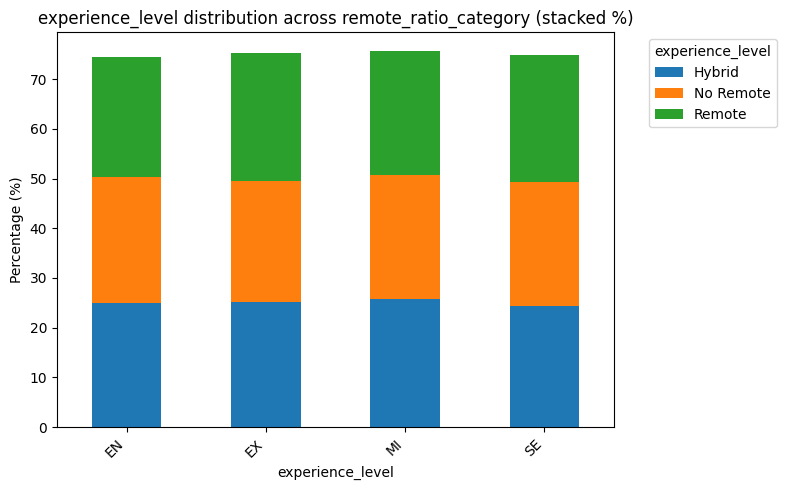

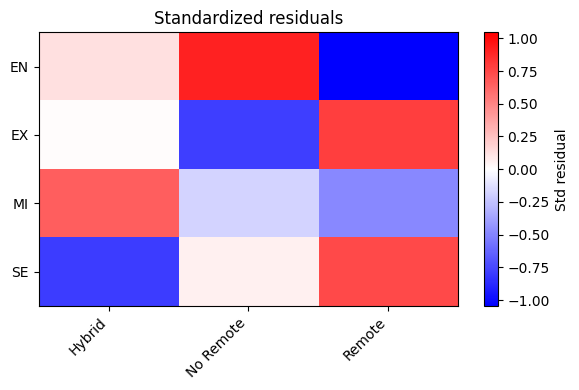


Analysis: employment_type vs company_size
H0: Variables 'employment_type' and 'company_size' are independent (no association).
H1: Variables 'employment_type' and 'company_size' are associated (there is an association).
------------------------------------------------------------
Contingency table (counts):
company_size        L     M     S
employment_type                  
CT               1220  1230  1271
FL               1265  1246  1247
FT               1272  1285  1255
PT               1241  1234  1234

Chi2 = 1.726364
Degrees of freedom = 6
p-value = 0.943068 
n = 15000, table shape = 4 x 3

Expected frequencies:
company_size           L        M        S
employment_type                           
CT               1239.84  1239.09  1242.07
FL               1252.17  1251.41  1254.42
FT               1270.16  1269.40  1272.45
PT               1235.84  1235.10  1238.06

Standardized residuals (obs - exp) / sqrt(exp):
company_size         L      M      S
employment_type             

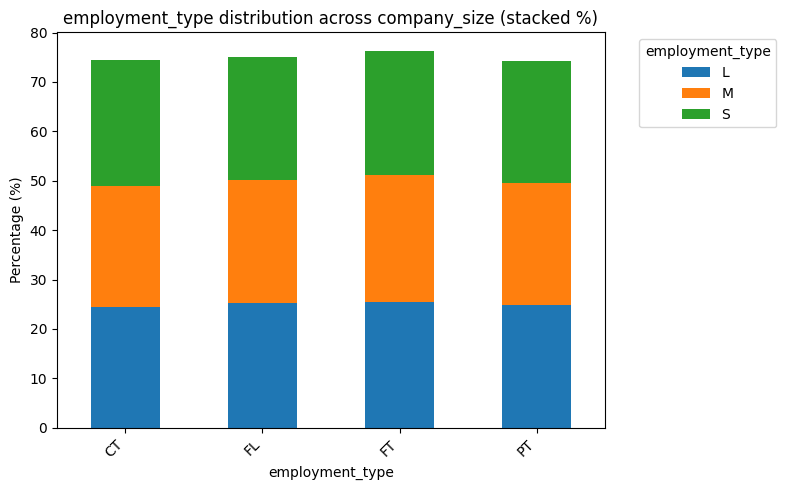

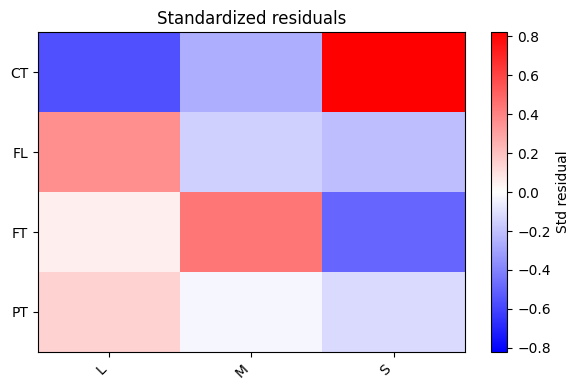


Analysis: employment_type vs remote_ratio_category
H0: Variables 'employment_type' and 'remote_ratio_category' are independent (no association).
H1: Variables 'employment_type' and 'remote_ratio_category' are associated (there is an association).
------------------------------------------------------------
Contingency table (counts):
remote_ratio_category  Hybrid  No Remote  Remote
employment_type                                 
CT                       1241       1216    1264
FL                       1228       1298    1232
FT                       1265       1303    1244
PT                       1271       1258    1180

Chi2 = 6.321815
Degrees of freedom = 6
p-value = 0.388122 
n = 15000, table shape = 4 x 3

Expected frequencies:
remote_ratio_category   Hybrid  No Remote   Remote
employment_type                                   
CT                     1241.57    1258.94  1220.49
FL                     1253.92    1271.46  1232.62
FT                     1271.94    1289.73  1250.34


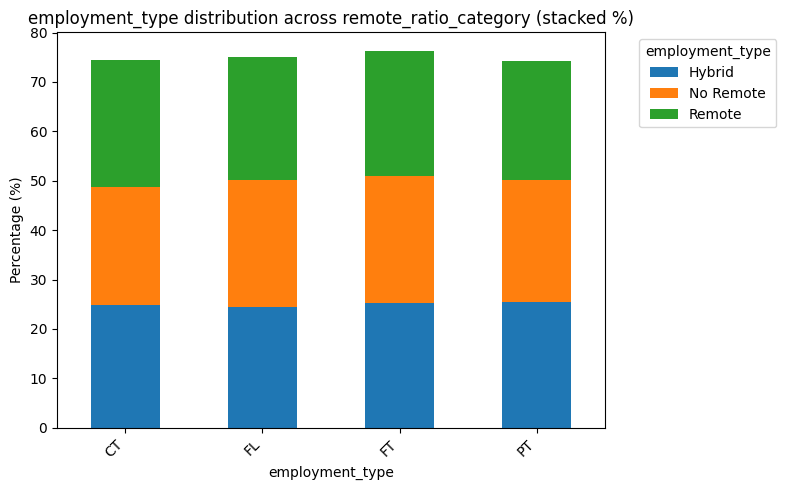

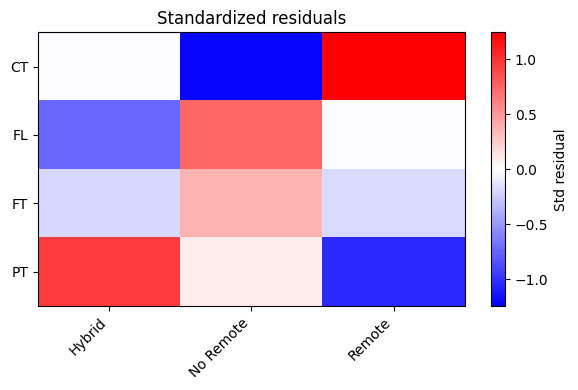


Analysis: company_size vs remote_ratio_category
H0: Variables 'company_size' and 'remote_ratio_category' are independent (no association).
H1: Variables 'company_size' and 'remote_ratio_category' are associated (there is an association).
------------------------------------------------------------
Contingency table (counts):
remote_ratio_category  Hybrid  No Remote  Remote
company_size                                    
L                        1693       1680    1625
M                        1620       1695    1680
S                        1692       1700    1615

Chi2 = 3.708647
Degrees of freedom = 4
p-value = 0.446869 
n = 15000, table shape = 3 x 3

Expected frequencies:
remote_ratio_category   Hybrid  No Remote   Remote
company_size                                      
L                      1667.67    1690.99  1639.34
M                      1666.66    1689.98  1638.36
S                      1670.67    1694.04  1642.30

Standardized residuals (obs - exp) / sqrt(exp):
remote_ra

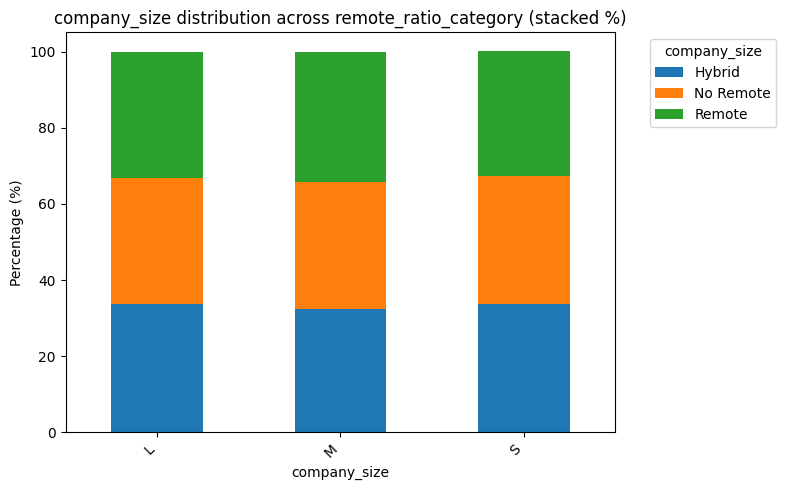

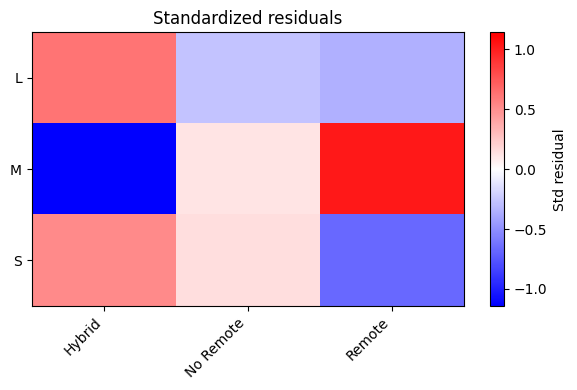

In [249]:
import itertools
from pandas.api.types import is_bool_dtype

# used llm to beautify and standardize output for each pair of variables


for c in df_categorical_vars.columns:
    if is_bool_dtype(df_categorical_vars[c]):
        df_categorical_vars[c] = df_categorical_vars[c].astype(int)
    df_categorical_vars[c] = df_categorical_vars[c].fillna("Missing").astype(str)


def chi2_analysis(var_a, var_b, df_sub, plot=True, alpha=0.05, show_tables=True,
                  top_k_per_col=2, similarity_threshold_pct=5.0):
    a = df_sub[var_a].astype(str)
    b = df_sub[var_b].astype(str)

    ct = pd.crosstab(a, b)
    if ct.size == 0:
        print(f"No data for pair {var_a} vs {var_b}")
        return None

    r, k = ct.shape
    n = int(ct.values.sum())

    # hypotheses
    h0 = f"H0: Variables '{var_a}' and '{var_b}' are independent (no association)."
    h1 = f"H1: Variables '{var_a}' and '{var_b}' are associated (there is an association)."

    print("\n" + "="*60)
    print(f"Analysis: {var_a} vs {var_b}")
    print(h0); print(h1)
    print("-"*60)

    if show_tables:
        print("Contingency table (counts):")
        print(ct)

    # chi-square test
    use_yates = (r == 2 and k == 2)
    chi2, p, dof, expected = stats.chi2_contingency(ct, correction=use_yates)
    expected = np.array(expected, dtype=float)

    # check expected frequencies
    small_cells = (expected < 5).sum()
    prop_small = small_cells / expected.size if expected.size else 0.0

    # standardized residuals (avoid division by zero)
    with np.errstate(divide='ignore', invalid='ignore'):
        std_resid = (ct.values - expected) / np.sqrt(expected)
        std_resid[~np.isfinite(std_resid)] = np.nan

    # prepare table representations
    expected_df = pd.DataFrame(expected, index=ct.index, columns=ct.columns)
    std_resid_df = pd.DataFrame(std_resid, index=ct.index, columns=ct.columns)

    print(f"\nChi2 = {chi2:.6f}")
    print(f"Degrees of freedom = {dof}")
    print(f"p-value = {p:.6f} {'(Yates applied)' if use_yates else ''}")
    print(f"n = {n}, table shape = {r} x {k}")

    if prop_small > 0:
        print(f"WARNING: {small_cells} cells ({prop_small:.1%}) have expected freq < 5 — interpret χ² with caution.")

    if show_tables:
        print("\nExpected frequencies:")
        print(expected_df.round(2))
        print("\nStandardized residuals (obs - exp) / sqrt(exp):")
        print(std_resid_df.round(3))

    ct_pct = ct.div(ct.sum(axis=0), axis=1) * 100
    print("\nDistribution of", var_a, "within each", var_b, "(%) :")
    print(ct_pct.round(2))

    applicability_lines = []
    applicability_lines.append("Why chi-square is applicable / not applicable to this pair:")
    applicability_lines.append(f"- Data types: both variables have been converted to categorical (strings).")
    applicability_lines.append(f"- Sample size: n = {n}. With large n, χ² is sensitive to small effects.")
    applicability_lines.append(f"- Table size: {r} x {k} levels (rows x columns).")
    applicability_lines.append(f"- Expected-frequency rule: {small_cells} cells ({prop_small:.1%}) have expected < 5.")
    if prop_small > 0.2:
        applicability_lines.append("  → Since >20% of cells have small expected counts (<5), χ² results may be unreliable. "
                                  "Consider Fisher's exact test (for 2x2), collapsing rare categories, or a permutation test.")
    else:
        applicability_lines.append("  → The expected-frequency condition is generally satisfied; χ² is applicable.")
    if use_yates:
        applicability_lines.append(" - Yates' continuity correction was applied for 2x2 tables.")
    applicability_lines.append(f"- Formal test summary: χ² = {chi2:.4f}, df = {dof}, p = {p:.4e}.")
    if p < alpha:
        applicability_lines.append("  → p < α: statistically significant association (reject H0).")
    else:
        applicability_lines.append("  → p ≥ α: no statistically significant association found (fail to reject H0).")

    applicability = "\n".join(applicability_lines)

    tendencies_lines = []
    tendencies_lines.append("Tendencies in the frequency distribution (based on column-wise percentages):")
    max_cols_to_report = min(k, 8)
    for j, col in enumerate(ct.columns[:max_cols_to_report]):
        col_pct = ct_pct[col].sort_values(ascending=False)
        top_k = col_pct.head(top_k_per_col)
        bottom_k = col_pct.tail(top_k_per_col)
        tendencies_lines.append(f"\n- For {var_b} = '{col}':")
        for idx, val in top_k.items():
            tendencies_lines.append(f"    • {var_a} = '{idx}' — {val:.1f}% (one of the most frequent)")
        for idx, val in bottom_k.items():
            tendencies_lines.append(f"    • {var_a} = '{idx}' — {val:.1f}% (rare)")

    pct_by_a = ct_pct.fillna(0)
    if pct_by_a.size > 0:
        ranges = pct_by_a.max(axis=1) - pct_by_a.min(axis=1)
        max_diff = ranges.max()
        max_diff_cat = ranges.idxmax()
        tendencies_lines.append(f"\n- Largest difference in shares for a single level of {var_a} = '{max_diff_cat}': difference across columns ≈ {max_diff:.1f}%")
        if max_diff < similarity_threshold_pct:
            tendencies_lines.append(f"  → Overall, column distributions are similar (max diff < {similarity_threshold_pct}%).")
        else:
            tendencies_lines.append(f"  → There are noticeable differences between columns (max diff = {max_diff:.1f}%).")

    if p < alpha:
        interp = (f"Interpretation: p < {alpha} → reject H0. "
                  f"A statistically significant association was found between '{var_a}' and '{var_b}' "
                  f"(p = {p:.4e}).")
    else:
        interp = (f"Interpretation: p >= {alpha} → failed to reject H0. "
                  f"No statistically significant association between '{var_a}' and '{var_b}' at α = {alpha} "
                  f"(p = {p:.4e}).")

    sr_df = std_resid_df
    sig = sr_df.stack().reset_index()
    sig.columns = [var_a, var_b, 'std_resid']
    sig_pos = sig[sig['std_resid'] > 2].sort_values('std_resid', ascending=False)
    sig_neg = sig[sig['std_resid'] < -2].sort_values('std_resid')
    if not sig_pos.empty or not sig_neg.empty:
        tendencies_lines.append("\n- Cells contributing substantially (|std_resid| > 2):")
        for _, row in pd.concat([sig_pos, sig_neg]).iterrows():
            a_val, b_val, rres = row[var_a], row[var_b], row['std_resid']
            obs = int(ct.loc[a_val, b_val])
            exp = expected[ct.index.get_loc(a_val), ct.columns.get_loc(b_val)]
            share_col = (obs / ct[b_val].sum()) * 100 if ct[b_val].sum() else np.nan
            direction = "more than expected" if rres > 0 else "less than expected"
            tendencies_lines.append(f"    • ({var_a}='{a_val}', {var_b}='{b_val}') — std_resid={rres:.2f}: obs={obs}, exp={exp:.2f} ({direction}); share in column {b_val}: {share_col:.1f}%")
    else:
        tendencies_lines.append("\n- No cells with |standardized residual| > 2 — no obvious individual contributors.")

    tendencies = "\n".join(tendencies_lines)

    print("\n" + "-"*40)
    print("APPLICABILITY:")
    print(applicability)
    print("\nHYPOTHESES:")
    print(h0)
    print(h1)
    print("\nTENDENCIES:")
    print(tendencies)

    print("\nINTERPRETATION:")
    print(interp)

    if plot:
        fig, ax = plt.subplots(figsize=(8, 5))
        ct_pct.plot(kind='bar', stacked=True, ax=ax)
        ax.set_ylabel("Percentage (%)")
        ax.set_title(f"{var_a} distribution across {var_b} (stacked %)")
        ax.legend(title=var_a, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        vmax = np.nanmax(np.abs(std_resid)) if std_resid.size else 1
        fig2, ax2 = plt.subplots(figsize=(max(6, k*1.2), max(4, r*0.6)))
        im = ax2.imshow(std_resid, cmap='bwr', aspect='auto', vmin=-vmax, vmax=vmax)
        ax2.set_xticks(np.arange(k))
        ax2.set_yticks(np.arange(r))
        ax2.set_xticklabels(ct.columns, rotation=45, ha='right')
        ax2.set_yticklabels(ct.index)
        ax2.set_title("Standardized residuals")
        cbar = fig2.colorbar(im, ax=ax2)
        cbar.set_label("Std residual")
        plt.tight_layout()
        plt.show()


results = {}
for var_a, var_b in itertools.combinations(categorical_vars, 2):
    results[(var_a, var_b)] = chi2_analysis(var_a, var_b, df_categorical_vars, plot=True)


----------

3. Calculate appropriate correlation coefficients between **any three pairs** of variables. Explain the selection of the correlation coefficient. Fill in the table below. Interpret the results. Create suitable graphs to visualize the analyzed relationships. 

| Variables | Appropriate correlation coefficient(justification of the choice) | Hypotheses | Strength of the relationship | Direction of the relationship | Statistical significance of the relationship! |
| --- | --- | --- | --- | --- | --- |
| salary_usd vs years_experience | Pearson (both continuous, linear relationship are expected) | H0: ρ=0 (no correlation), H1: ρ≠0 | Strong (r = 0.738) | Positive (more experience means higher salary) | Highly significant (ρ = 0.000000) |
| salary_usd vs benefits_score | Spearman (monotonic, not strictly linear; benefits are bounded 1–10) | H0: ρ=0, H1: ρ≠0 | None (r = –0.005) | No direction (practically zero) | Not significant (ρ = 0.554) |
| salary_usd vs remote_ratio | Spearman (remote_ratio has a natural order but not continuous) | H0: ρ=0, H1: ρ≠0 | Very weak (r = 0.017) | Slightly positive (more remote work leads to tiny salary increase) | Statistically significant (ρ = 0.042) but not practically meaningful |

In [250]:
from scipy.stats import pearsonr, spearmanr


# calculate correlation between salary_usd and years_experience
x1 = df["years_experience"]
y1 = df["salary_usd"]
pearson_corr, pearson_p = pearsonr(x1, y1)

# calculate correlation between salary_usd and benefits_score
x2 = df["benefits_score"]
y2 = df["salary_usd"]
spearman_corr, spearman_p = spearmanr(x2, y2)

# calculate correlation between salary_usd and remote_ratio
x3 = df["remote_ratio"]
y3 = df["salary_usd"]
spearman2_corr, spearman2_p = spearmanr(x3, y3)

# print results of correlation analysis
results = pd.DataFrame({
    "Variables": [
        "salary_usd vs years_experience",
        "salary_usd vs benefits_score",
        "salary_usd vs remote_ratio"
    ],
    "Correlation Coefficient": [
        round(pearson_corr, 3),
        round(spearman_corr, 3),
        round(spearman2_corr, 3)
    ],
    "p-value": [
        pearson_p,
        spearman_p,
        spearman2_p
    ]
})

print(results)


                        Variables  Correlation Coefficient   p-value
0  salary_usd vs years_experience                    0.738  0.000000
1    salary_usd vs benefits_score                   -0.005  0.553688
2      salary_usd vs remote_ratio                    0.017  0.042127


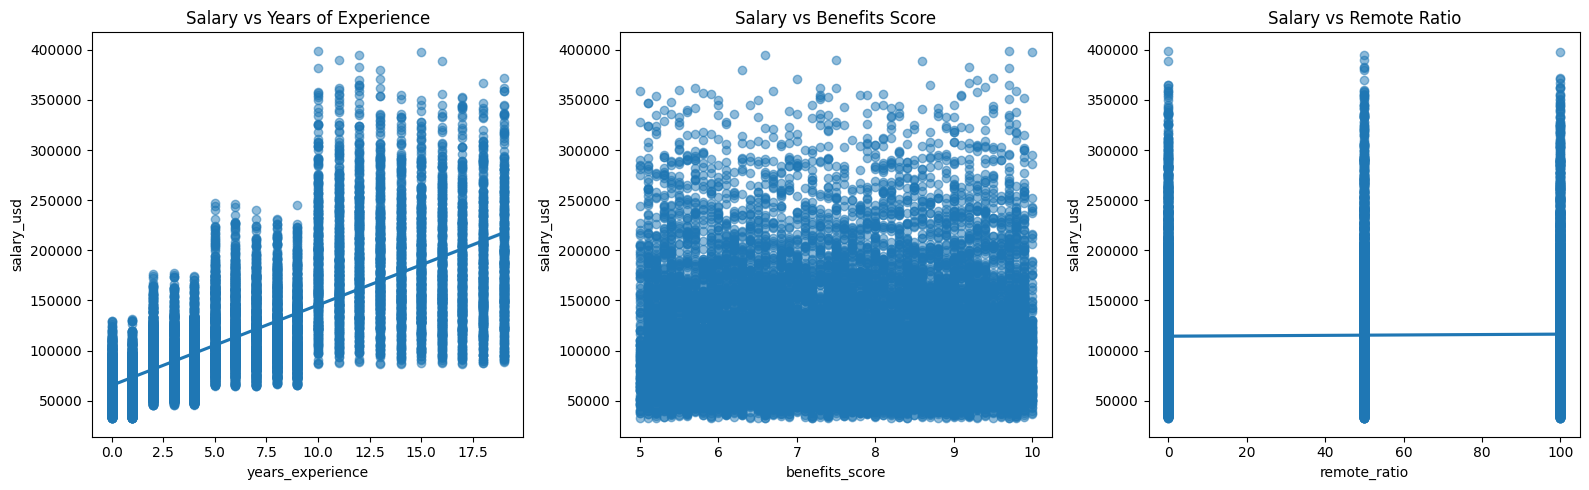

In [251]:
"""
visualization of results
"""

plt.figure(figsize=(16,5))

# 1. Salary vs Experience
plt.subplot(1,3,1)
sns.regplot(x=x1, y=y1, scatter_kws={'alpha':0.5})
plt.title("Salary vs Years of Experience")

# 2. Salary vs Benefits Score
plt.subplot(1,3,2)
sns.regplot(x=x2, y=y2, scatter_kws={'alpha':0.5}, lowess=True)
plt.title("Salary vs Benefits Score")

# 3. Salary vs Remote Ratio
plt.subplot(1,3,3)
sns.regplot(x=x3, y=y3, scatter_kws={'alpha':0.5})
plt.title("Salary vs Remote Ratio")

plt.tight_layout()
plt.show()

-----------

4. Calculate a paired correlation coefficient between any variables. Then calculate the partial correlation coefficient between the same pair of variables controlling for any other third variable. Interpret the results of analysis. Create suitable graphs to visualize the analyzed relationships.

In [252]:
# chosen variables are salary_usd and years_experience

# calculate paired correlation between salary_usd and years_experience using pearsonr
pearson_corr, p_value = pearsonr(df['salary_usd'], df['years_experience'])

print(f"Pearson correlation between salary and years of experience: {pearson_corr:.3f}, p-value: {p_value:.3e}")

Pearson correlation between salary and years of experience: 0.738, p-value: 0.000e+00


In [253]:
# Convert categorical variables to numeric to check correlation between numeric variables

# Experience level
exp_mapping = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
df['experience_level_num'] = df['experience_level'].map(exp_mapping)

# Company size
size_mapping = {'S': 1, 'M': 2, 'L': 3}
df['company_size_num'] = df['company_size'].map(size_mapping)

# Education required
edu_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
df['education_required_num'] = df['education_required'].map(edu_mapping)


                        salary_usd  years_experience  company_size_num  \
salary_usd                1.000000          0.740581          0.196077   
years_experience          0.740581          1.000000          0.001798   
company_size_num          0.196077          0.001798          1.000000   
experience_level_num      0.758504          0.925405          0.006105   
education_required_num   -0.014264         -0.018139          0.002567   
benefits_score            0.006784         -0.000910          0.010899   
job_description_length   -0.020742         -0.014435          0.014612   
remote_ratio              0.019531          0.021616          0.011947   

                        experience_level_num  education_required_num  \
salary_usd                          0.758504               -0.014264   
years_experience                    0.925405               -0.018139   
company_size_num                    0.006105                0.002567   
experience_level_num                1.000000 

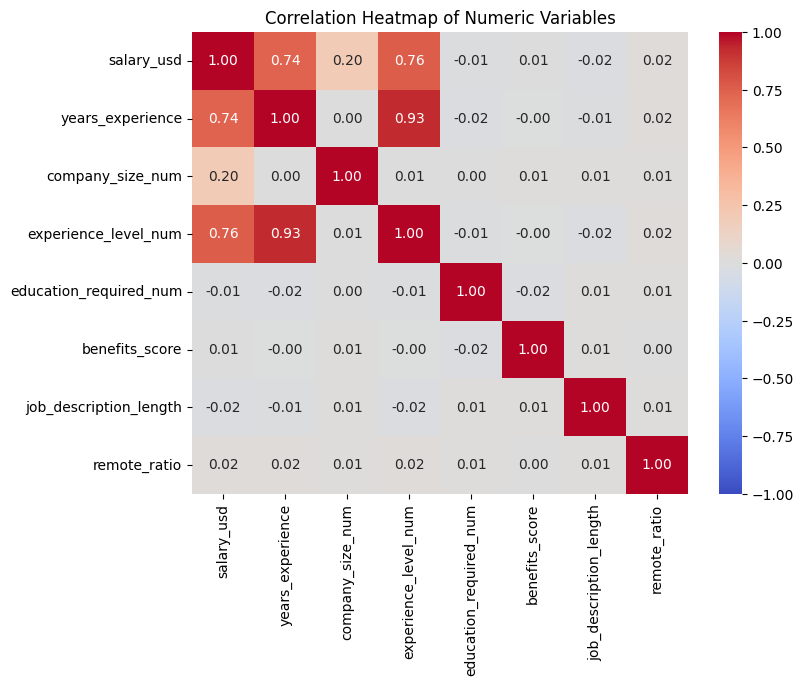

In [254]:
# Select numeric variables
numeric_cols = [
    'salary_usd', 
    'years_experience', 
    'company_size_num',
    'experience_level_num',
    'education_required_num',
    'benefits_score', 
    'job_description_length',
    'remote_ratio'
]
df_numeric = df[numeric_cols].dropna()

# Calculate correlation matrix
corr_matrix = df_numeric.corr(method='pearson')
print(corr_matrix)

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

# High correlation between salary_usd and years_experience, and salary_usd and experience_level_num
# Medium correlation between salary_usd and company_size
# Meanwhile, there is no strong correlation between other variables

In [255]:
import pingouin as pg # for partial correlation
# paired correlation was 0.738

# select needed columns
df_partial = df[['salary_usd', 'years_experience', 'experience_level_num', 'company_size_num']].dropna()

# Partial correlation controlling for only company_size_num
partial_corr = pg.partial_corr(data=df_partial,
                               x='salary_usd',
                               y='years_experience',
                               covar=['company_size_num'],
                               method='pearson')

print("Partial correlation between salary and years_experience controlling for experience_level and company_size:")
print(partial_corr)

# Correlation value increased from 0.738 to 0.753 because salary_usd and years_experience are positively correlated and salary_usd and company_size_num are negatively correlated.

Partial correlation between salary and years_experience controlling for experience_level and company_size:
             n         r         CI95%  p-val
pearson  15000  0.752911  [0.75, 0.76]    0.0


In [256]:
# Partial correlation controlling for only years_experience
partial_corr = pg.partial_corr(data=df_partial,
                               x='salary_usd',
                               y='years_experience' ,
                               covar=['experience_level_num'],
                               method='pearson')

print("Partial correlation between salary and years_experience controlling for experience_level and company_size:")
print(partial_corr)

# Correlation value decreased from 0.753 to 0.149 because experience_level_num and years_experience are strongly correlated (p = 0.93).

Partial correlation between salary and years_experience controlling for experience_level and company_size:
             n         r         CI95%         p-val
pearson  15000  0.148618  [0.13, 0.16]  8.053807e-75


In [257]:
# Partial correlation controlling for both years_experience and company_size_num
partial_corr = pg.partial_corr(data=df_partial,
                               x='salary_usd',
                               y='years_experience',
                               covar=['experience_level_num', 'company_size_num'],
                               method='pearson')

print("Partial correlation between salary and years_experience controlling for experience_level and company_size:")
print(partial_corr)

# With both covars removed, the partial correlation became 0.159
# Thus, much of the raw correlation between salary and years of experience is actually explained by experience level and company size.
# In other words, higher salaries are not just about more years of experience — they are also about being at a higher level (grade) and/or a bigger company.

Partial correlation between salary and years_experience controlling for experience_level and company_size:
             n         r         CI95%         p-val
pearson  15000  0.158844  [0.14, 0.17]  2.484838e-85


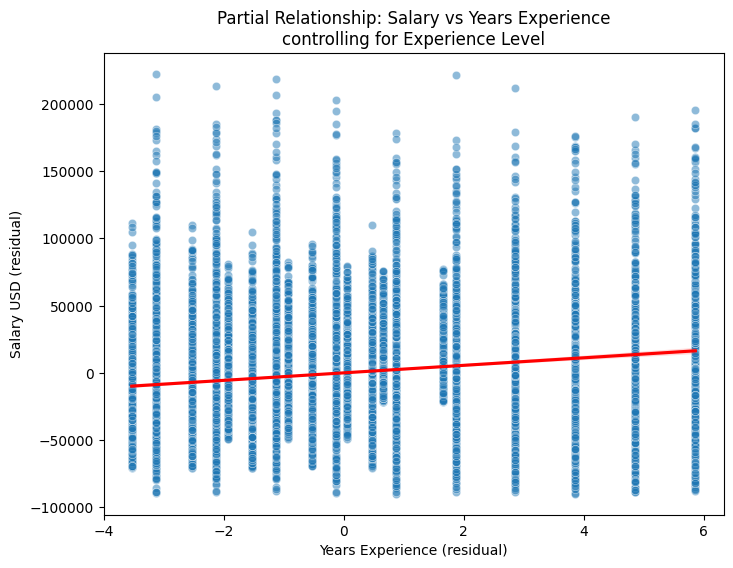

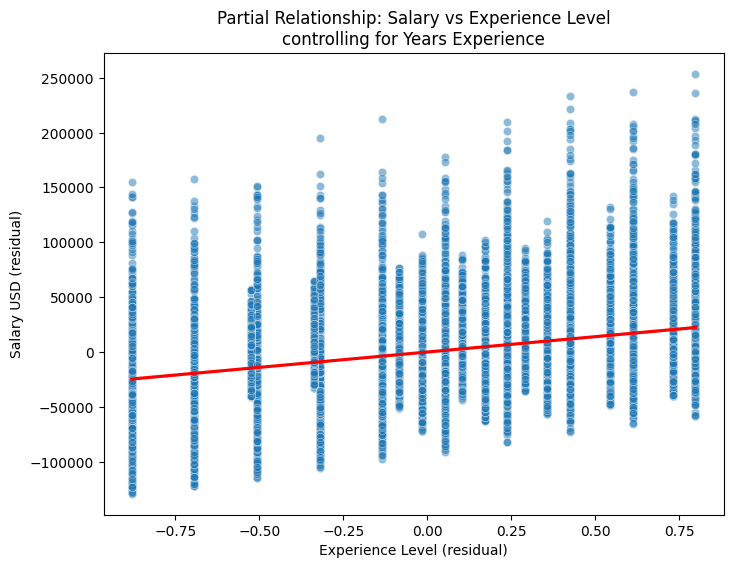

In [258]:
import statsmodels.api as sm

# 1. Partial correlation: salary vs years_experience controlling for experience_level
# Regress salary on experience_level
X = sm.add_constant(df['experience_level_num'])
y = df['salary_usd']
model = sm.OLS(y, X).fit()
residual_salary = model.resid

# Regress years_experience on experience_level
y_exp = df['years_experience']
model_exp = sm.OLS(y_exp, X).fit()
residual_exp = model_exp.resid

# Scatterplot of residuals
plt.figure(figsize=(8,6))
sns.scatterplot(x=residual_exp, y=residual_salary, alpha=0.5)
sns.regplot(x=residual_exp, y=residual_salary, scatter=False, color='red')
plt.xlabel("Years Experience (residual)")
plt.ylabel("Salary USD (residual)")
plt.title("Partial Relationship: Salary vs Years Experience\ncontrolling for Experience Level")
plt.show()


# 2. Partial correlation: salary vs experience_level controlling for years_experience
# Regress salary on years_experience
X = sm.add_constant(df['years_experience'])
model = sm.OLS(y, X).fit()
residual_salary = model.resid

# Regress experience_level on years_experience
X = sm.add_constant(df['years_experience'])
y_level = df['experience_level_num']
model_level = sm.OLS(y_level, X).fit()
residual_level = model_level.resid

# Scatterplot of residuals
plt.figure(figsize=(8,6))
sns.scatterplot(x=residual_level, y=residual_salary, alpha=0.5)
sns.regplot(x=residual_level, y=residual_salary, scatter=False, color='red')
plt.xlabel("Experience Level (residual)")
plt.ylabel("Salary USD (residual)")
plt.title("Partial Relationship: Salary vs Experience Level\ncontrolling for Years Experience")
plt.show()


Comments on the task and principles of its assessment:

- All points of the task must be accompanied by _executed_ code fragments.
- All results of the code execution (statistics, graphs, tables) should be commented, conclusions in the written form should be made based on them.
- If you have completed this task, you will receive 8 points (excellent grade). To get a higher grade (9 or 10), you need to go beyond the proposed task. For example, use additional methods to investigate relationships between variables.
- This task consists of four parts. The first weighs 20%, the second - 20%, the third - 20%, the fourth - 20%.
- The task can be completed individually or in a group of 2 students, the assessment criteria will be the same.
- If the task is completed by 2 students, then only one of the students should upload the work to SmartLMS.
- The name of the file uploaded to SmartLMS should include the last name(s) of the author(s) of the work.
- If you use AI in the work, you must indicate where and how exactly it was used.

### Please upload the Jupyter Notebook with comments and answers in SmartLMS. The deadline is 17 September 23:55. 